# IMDB Reviews Sentiment Analyses

This notebook uses Kaggle dataset (https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

1. Import dataset
2. Data analysis
3. Data preparation
4. Creation of training and test dataset
5. Model training
6. Model evaluation
7. Model selection
8. Deploy model to Watson Machine Learning
9. Final model evaluation

In [1]:
!pip install nltk

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import json

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leonardofurnielis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leonardofurnielis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 1.0 - Import dataset

In [4]:
# The code was removed by IBM Watson Studio for sharing.

## 2.0 - Data analysis

In [5]:
df = df_data_1
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Text(0.5, 1.0, 'Sentiment label distribution')

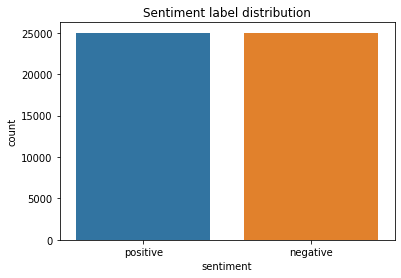

In [7]:
ax = sns.countplot(x="sentiment", data=df)
plt.title("Sentiment label distribution")

## 3.0 - Data preparation

Data preparation using the following Text Feature Engineering techniques:

1. Tonkenization         
2. Removes stop words
3. Stemming text (porter)
4. Joining words (tokens) into a single string

In [8]:
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()

In [9]:
def identify_tokens(row):
    """Identify tokens in a row
    Args:
        row (list): row of dataframe
    
    Returns:
        list: text splited in tokens
    """
    source = row[0]
    tokens = word_tokenize(source)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [10]:
def remove_stops(row):
    """Remove stop words from text
    Args:
        row (list): row of dataframe
    
    Returns:
        list: list of tokens without stop words
    """
    source_tokenization = row[2]
    stop = [w for w in source_tokenization if not w in stop_words]
    return (stop)

In [11]:
def stem_porter(row):
    """Execute steamming porter
    Args:
        row (list): row of dataframe
    
    Returns:
        list: list of tokens with steamming.
    """  
    my_list = row[2]
    stemmed_list = [porter_stemmer.stem(word) for word in my_list]
    return (stemmed_list)

In [12]:
def rejoin_words(row):
    """Join tokens in a single string
    Args:
        row (list): row of dataframe
    
    Returns:
        str: text of joined tokens
    """   
    my_list = row[2]
    joined_words = (" ".join(my_list))
    return joined_words

In [13]:
def pre_processing(df):
    """Execute text feature engineering (TFE)
    Args:
        df (dataframe): row of dataframe
    
    Returns:
        list: Text post text feature engineering (TFE)
    """  
    print('Tokenization ...')
    df['text1'] = df.apply(identify_tokens, axis=1)
    print('Removing stop words ...')
    df['text1'] = df.apply(remove_stops, axis=1)
    print('Stemming (porter) ...')
    df['text1'] = df.apply(stem_porter, axis=1)
    print('Joining words ...')
    df['clean_text'] = df.apply(rejoin_words, axis=1)
    print('DONE!')
    
    return df

In [15]:
df = pre_processing(df)

df['clean_text'] = df['clean_text'].str.lower()
df.head()

Tokenization ...
Removendo stop words ...
Stemming (porter) ...
Juntando palavras ...
DONE!


,review,sentiment,text1,clean_text
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, oz, episod, hook...",one review mention watch oz episod hook they r...
1,A wonderful little production. <br /><br />The...,positive,"[a, wonder, littl, product, br, br, the, film,...",a wonder littl product br br the film techniqu...
2,I thought this was a wonderful way to spend ti...,positive,"[i, thought, wonder, way, spend, time, hot, su...",i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi...",basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st...",petter mattei love time money visual stun film...


## 4.0 - Creation of training and test dataset
NOTE: Test dataset (30%) and Training dataset (70%) balanced (Stratified)

In [18]:
X = df['clean_text']
Y = df['sentiment']

print(X.shape)
print(Y.shape)

(50000,)
(50000,)


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

NOTE: Machine Learning or Deep Learning models uses numeric values input. The Tf-Idf Text Feature Engineering (TFE) process will be used to transform the texts into vectors.

In [20]:
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(2,3), sublinear_tf=True)

X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

print(Y.value_counts().shape)
print(X_train_tf.shape)

(2,)
(35000, 2000)


In [21]:
le = preprocessing.LabelEncoder()

Y_train_le = le.fit_transform(list(Y_train))
Y_test_le = le.transform(list(Y_test))

## 5.0 - Model training

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
# Binary classifiers
# GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train_tf, Y_train_le)
Y_predict_gradient_boost = gradient_boost.predict(X_test_tf)
print('Gradient Boosting Classifier DONE!')

# SVC -- taking too much time
# svc_model = SVC(gamma='auto', kernel='sigmoid', C=1.8, probability=True)
# svc_model.fit(X_train_tf, Y_train_le)
# Y_predict_svm = svc_model.predict(X_test_tf)
# print('Support Vector Machine(SVM) DONE!')

# RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train_tf, Y_train_le)
Y_predict_random_forest = random_forest.predict(X_test_tf)
print('Random Forest Classifier DONE!')

# KNeighborsClassifier
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train_tf, Y_train_le)
Y_predict_k_neighbors = k_neighbors.predict(X_test_tf)
print('K Nearest Neighbor Classifier DONE!')

# LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs', penalty='l2', C=1.5)
logistic_regression.fit(X_train_tf, Y_train_le)
Y_predict_logistic_regression = logistic_regression.predict(X_test_tf)
print('Logistic Regression DONE!')

Gradient Boosting Classifier DONE!
Random Forest Classifier DONE!
K Nearest Neighbor Classifier DONE!
Logistic Regression DONE!


## 6.0 - Model evaluation

In [24]:
print('Gradient Boosting Classifier:  ', metrics.accuracy_score(Y_test_le, Y_predict_gradient_boost))
# print('Support Vector Machine(SVM):   ', metrics.accuracy_score(Y_test_le, Y_predict_svm))
print('Random Forest Classifier:      ', metrics.accuracy_score(Y_test_le, Y_predict_random_forest))
print('K Nearest Neighbor Classifier: ', metrics.accuracy_score(Y_test_le, Y_predict_k_neighbors))
print('Logistic Regression:           ', metrics.accuracy_score(Y_test_le, Y_predict_logistic_regression))

Gradient Boosting Classifier:   0.6953333333333334
Random Forest Classifier:       0.7282
K Nearest Neighbor Classifier:  0.5212
Logistic Regression:            0.7787333333333334


### 6.1 - Resume of classification
NOTE: Accuracy >= 0.70

In [25]:
# print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(Y_test_le, Y_predict_svm)))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(Y_test_le, Y_predict_random_forest)))
print('Logistic Regression:\n {}\n'.format(metrics.classification_report(Y_test_le, Y_predict_logistic_regression)))

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      7500
           1       0.75      0.68      0.71      7500

    accuracy                           0.73     15000
   macro avg       0.73      0.73      0.73     15000
weighted avg       0.73      0.73      0.73     15000


Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78      7500
           1       0.77      0.80      0.78      7500

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000




### 6.3 - Logistic Regression
NOTE: Best accuracy model confusion matrix

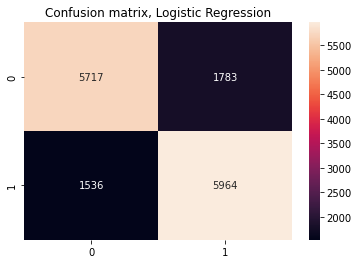

In [41]:
logistic_regression_conf_matrix = metrics.confusion_matrix(Y_test_le, Y_predict_logistic_regression)
sns.heatmap(logistic_regression_conf_matrix, annot=True,  fmt='');
plt.title('Confusion matrix, Logistic Regression');

NOTE: Best accuracy model ROC curve

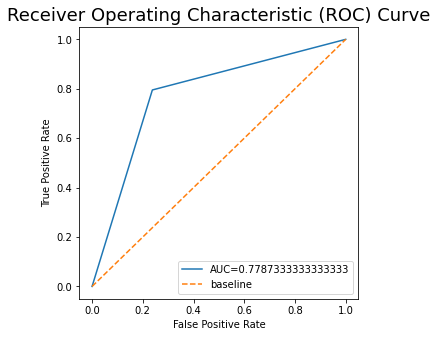

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test_le, Y_predict_logistic_regression)
auc = metrics.roc_auc_score(Y_test_le, Y_predict_logistic_regression)

plt.subplots(figsize=(5,5))
plt.plot(fpr,tpr, label="AUC="+str(auc))
plt.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
plt.legend(loc=4)
plt.show()

## 7.0 - Model selection

In [42]:
X_train_final = tfidf.fit_transform(X)
Y_train_final = le.fit_transform(list(Y))

print(X_train_final.shape)

(50000, 2000)


In [43]:
lrc = LogisticRegression(solver='lbfgs', penalty='l2', C=1.5)
lrc.fit(X_train_final, Y_train_final)

LogisticRegression(C=1.5)

## 8.0 - Deploy model to Watson Machine Learning

To authenticate to Watson Machine Learning in the IBM Cloud, you need api_key and service location.

Using [IBM Cloud CLI](https://cloud.ibm.com/docs/cli/index.html) or directly through the IBM Cloud portal.

Using IBM Cloud CLI:

```
ibmcloud login
ibmcloud iam api-key-create API_KEY_NAME
```

NOTE: To get the Service URL [Endpoint URLs section of the Watson Machine Learning docs](https://cloud.ibm.com/apidocs/machine-learning).

In [ ]:
api_key = 'API_KEY'
location = 'LOCATION'

In [ ]:
wml_credentials = {
    "apikey": api_key,
    "url": location
}

### 8.1 Installing Watson Machine Learning library

NOTE: Documentation could be found [here](http://ibm-wml-api-pyclient.mybluemix.net/)

In [ ]:
!pip install -U ibm-watson-machine-learning

In [ ]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)
print(client.version)

### 8.2 Creating deployment space

Create an deployment space in Watson Studio that will be used to deploy model.

1. Click on "New Deployment Space"
2. Select the Cloud Object Storage instance
3. Select the Watson Machine Learning instance and click "Create"
4. Copy "space_id" and paste below


In [ ]:
space_id = 'SPACE_ID'

In [ ]:
client.spaces.list(limit=10)

In [ ]:
client.set.default_space(space_id)

In [ ]:
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")
metadata = {
            client.repository.ModelMetaNames.NAME: 'Logistic Regression model to predict IMDB reviews',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=lrc,
    meta_props=metadata)

In [ ]:
published_model_uid = client.repository.get_model_id(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

In [ ]:
client.repository.list_models()

In [ ]:
# client.repository.delete('ID of stored model')

In [ ]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of IMDB reviews",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)

In [ ]:
# Get deployment UID and show details on the deployment
deployment_uid = client.deployments.get_uid(created_deployment)
client.deployments.get_details(deployment_uid)

In [ ]:
client.deployments.list()

In [ ]:
# client.deployments.delete('GUID of deployed model')

## 9.0 - Final model evaluation

NOTE: Test created API from WML.

In [ ]:
# get scoring end point
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

In [ ]:
# add some test data
scoring_payload = {"input_data": [
    {'values': X_test_tf.toarray()
    }]}

In [ ]:
# score the model
predictions = client.deployments.score(deployment_uid, scoring_payload)
print('prediction',json.dumps(predictions, indent=2))

In [ ]:
Y_predict_final_model = []
for y in predictions['predictions'][0]['values']:
    Y_predict_final_model.append(y[0])
    
print('Final Model WML:\n {}\n'.format(metrics.classification_report(Y_test_le, Y_predict_final_model)))